# Pymaceuticals Inc.
---

### Analysis

- The Statistical data provides insight on the consistency and reliability of the tumor volume within each treatment group The following is interpreted base on the statistical results:

1. Standard Deviation- Drugs Regimen such as Ketapril and Naftisol has a higher standard deviation 8.279, 8.134 respectively compare with the results sample. This suggest variability in tumor volume which means individual tumor volumes within the regimen can deviate more from the mean. Conversely,Capomulin and Ramicane  has a lower standard deviation based on the sample results which indicates that the tumor volumes are close to the mean. This can indicate that they do not deviate significantly from the average, and can suggest a certain level of predictability and stability.

2. Standard Error of the mean(SEM)- In context of the tumor volume for each regimen a smaller SEM suggest that the sample mean is more precise  estimate of the true population.

Observation

- Tumor Volume over Time  - The line plot of tumor volume overtime for a single mouse treated with Capomulin shows the trend of tumor volume reduction over the corse of the treatment.

- Mouse Weight vs Tumor Volume  - The scatter plot illustrates a generally positive correlation between mouse weight and average tumor volume for the Capomulin regimen.

- Correlation and Regression - The correlation between mouse weight and the average tumor volume is 0.84, this indicates a strong positive correlation. This suggest that as the mouse weight increase, the average tumor volume as tend to increase.
 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path ="data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
merge_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [10]:
# Checking the number of mice.
mouse_count = mouse_metadata["Mouse ID"].count()
mouse_count

249

In [60]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_data[merge_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]


     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            4

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
#merge_data.duplicated(['Mouse ID'])
print(duplicate_mice)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            4

In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [65]:
# Checking the number of mice in the clean DataFrame.
mice_count= clean_data["Mouse ID"].nunique()
mice_count



249

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# This method produces everything in a single groupby function
summary_stats = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev": stdv, "Tumor Volume Std. Err.": sem})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', "var", "std","sem"])
print(summary_statistics)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

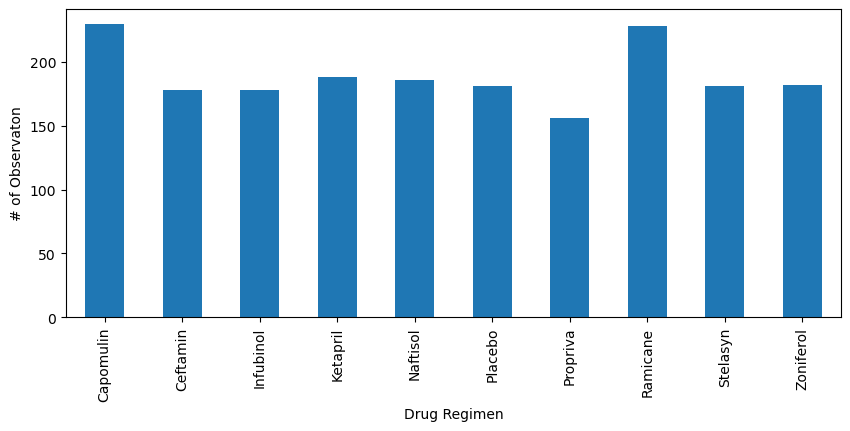

<Figure size 640x480 with 0 Axes>

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

data_plot = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
data_plot
data_plot.plot(kind="bar", figsize=(10,4))


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observaton")

plt.show()
plt.tight_layout()


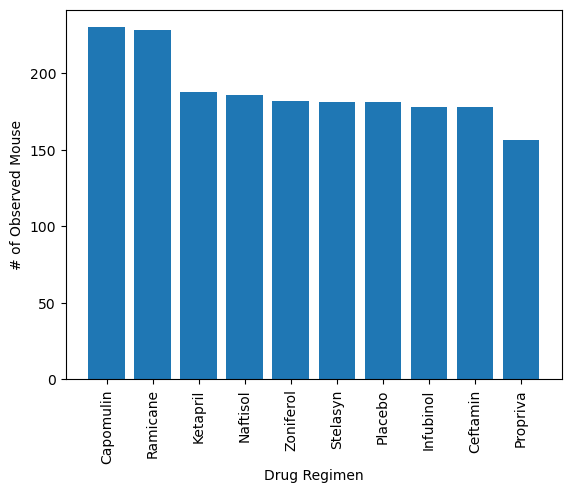

<Figure size 1200x800 with 0 Axes>

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

bar_data = clean_data["Drug Regimen"].value_counts()
plt.bar(bar_data.index, bar_data.values)
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse")
plt.figure(figsize=(12,8))


plt.show()




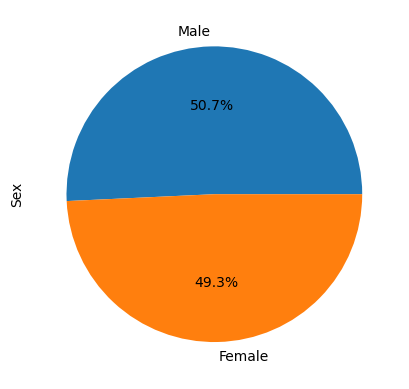

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_sex = clean_data["Sex"].value_counts().plot(kind="pie", autopct='%1.1f%%', ylabel="Sex")


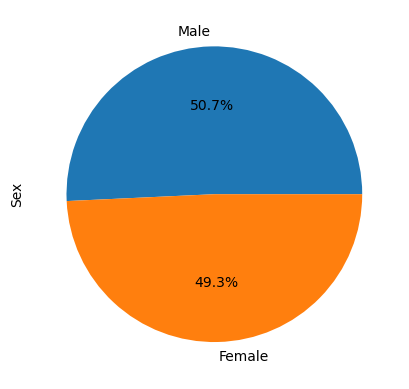

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_pie_chart = clean_data["Sex"].value_counts()
plt.pie(sex_pie_chart, labels=sex_pie_chart.index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_regimens:
    regimen_data = clean_data[clean_data['Drug Regimen'] == regimen]
    last_timepoint = regimen_data.groupby('Mouse ID')['Timepoint'].max()
    merged_data = pd.merge(last_timepoint.reset_index(), clean_data, on=['Mouse ID', 'Timepoint'], how='left')
    final_tumor_vol.append(merged_data['Tumor Volume (mm3)'])

# Determine outliers
for i in range(len(treatment_regimens)):
    quartiles = final_tumor_vol[i].quantile([0.25, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = final_tumor_vol[i][(final_tumor_vol[i] < lower_bound) | (final_tumor_vol[i] > upper_bound)]
    print(f"Outliers for {treatment_regimens[i]}: {outliers}")


Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


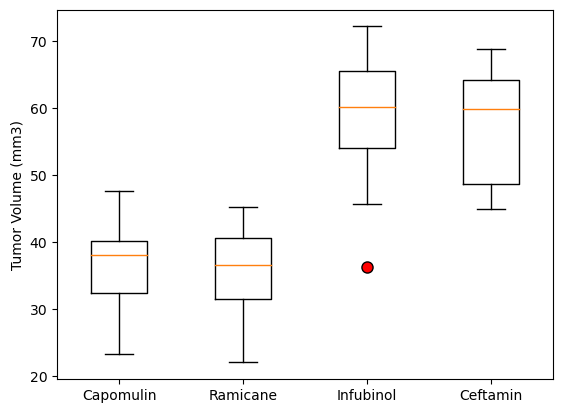

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(final_tumor_vol, labels=treatment_regimens, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.ylabel('Tumor Volume (mm3)')
plt.show()



## Line and Scatter Plots

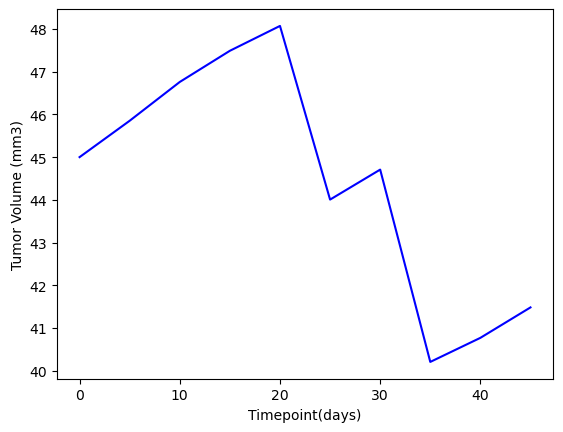

In [72]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = merge_data[(merge_data["Mouse ID"] == "l509")]
line_plot = line_plot.set_index("Timepoint")
line_plot

#Final plot
line_plot["Tumor Volume (mm3)"].plot(color = "blue")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

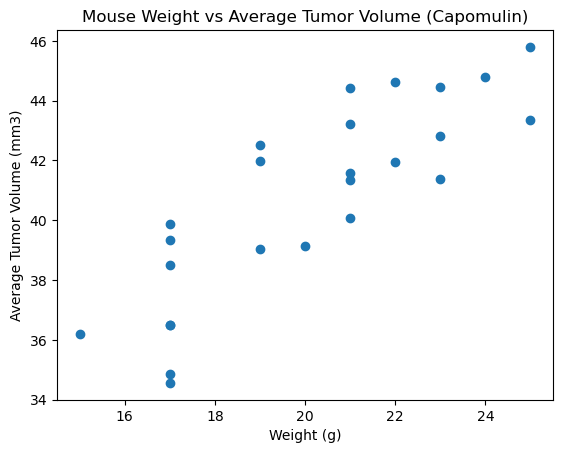

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(avg_weight, avg_tumor_volume)
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')




## Correlation and Regression

Correlation between weight and average tumor volume: 0.8419363424694719


<function matplotlib.pyplot.show(close=None, block=None)>

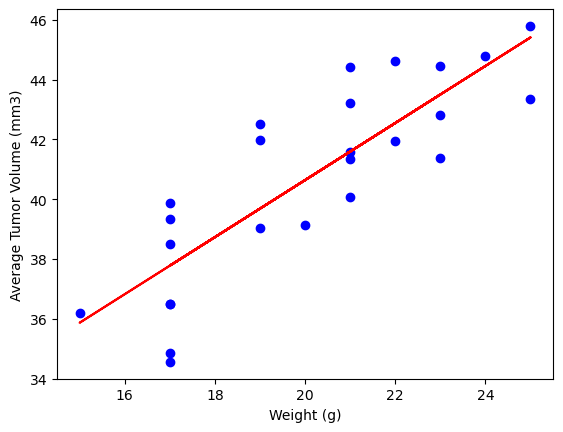

In [44]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_weight, avg_tumor_volume)
print(f"Correlation between weight and average tumor volume: {correlation[0]}")

# Linear regression model
slope, intercept, r_value, p_value, std_err = linregress(avg_weight, avg_tumor_volume)
regression_line = slope * avg_weight + intercept

# Plot the linear regression model

plt.plot(avg_weight, regression_line, color='red')


#using prior computing data to plot the regression line on the scatter plot

plt.scatter(avg_weight, avg_tumor_volume, color = "blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show